In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
print("SANJAY R - 24BAD407 - EX02")
df = pd.read_csv("/kaggle/input/calcofi/bottle.csv", low_memory=False)
df.info()

SANJAY R - 24BAD407 - EX02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   flo

In [10]:
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

In [11]:
data = df[features + [target]].dropna(subset=[target])

X = data[features]
y = data[target]

In [12]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Linear Regression Performance
MSE : 6.1731028133677075
RMSE: 2.484572963985503
R²  : 0.6560824824754617


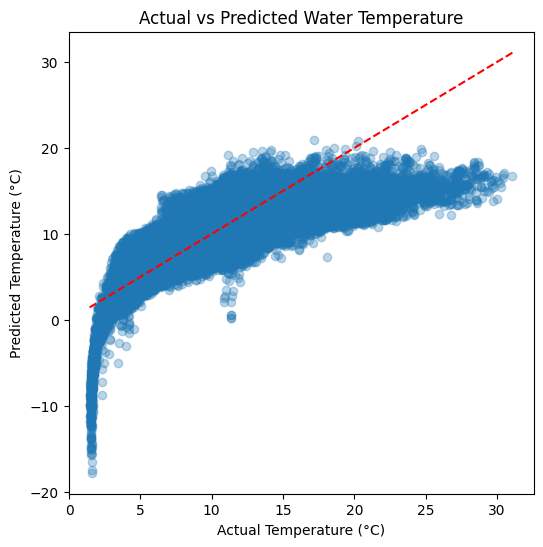

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

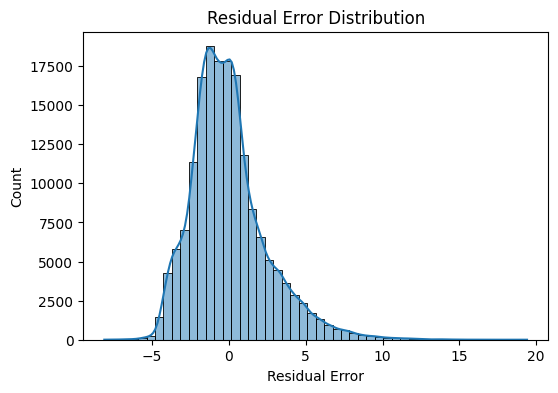

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Error Distribution")
plt.show()

In [20]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("\nRidge Regression R²:", r2_score(y_test, ridge_pred))


Ridge Regression R²: 0.6560824815436032


In [21]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Lasso Regression R²: 0.6560260695042146


In [22]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_
})

print("\nLinear Regression Coefficients")
print(coef_df)


Linear Regression Coefficients
  Feature  Coefficient
0  Depthm    -1.978008
1  Salnty     0.893311
2  O2ml_L     2.627537
